# Heart Disease Classification Problem

# Heart Disease Prediction 🩺❤️

## Overview 📈

Hey folks! Jump into my Heart Disease Prediction project, where I've explored the world of Logistic Regression to uncover the secrets behind heart health. Let's break it down in simple terms!

## Problem Statement 🎯

Ever wondered if we can predict the chance of heart disease? That's what got me intrigued. Using Logistic Regression, I've dived into the data to figure out what factors play a role in heart health.

## Usecase Solved 🌟

Imagine knowing your risk of heart disease before it gets serious. That's the goal! It's not just about predicting; it's about giving people the heads up to take care of their hearts.

## Benefits 🚀

1. **Spotting Trouble Early**: My Logistic Regression model acts like a health detective, catching potential heart issues early on.

2. **Smart Health Choices**: People can use the predictions to make little lifestyle changes and keep their hearts happy.

3. **Healthcare Boost**: Hospitals and doctors can use this tool to manage resources better and focus on preventive care.

Ready to dive into the heart of health predictions? Let's begin! 🩺✨


#### Here, we import the necessary python libraries for data preprocessing and visualisation.

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
df=pd.read_csv("C:\\Users\\Vichakshan\\Downloads\\ALL DATA SETS\\heart.excel.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,Negative
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Positive
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,Negative
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Positive
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,Negative


In [192]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [194]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


<Axes: >

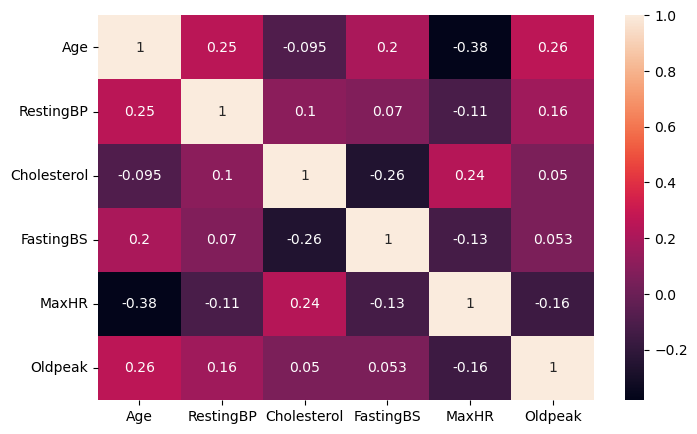

In [195]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

#### Using intuitive thinking, I visualize how the target variable tends to react to different features,First I ask, "Does a person's Age  have any impact on their Heart attack result?".  

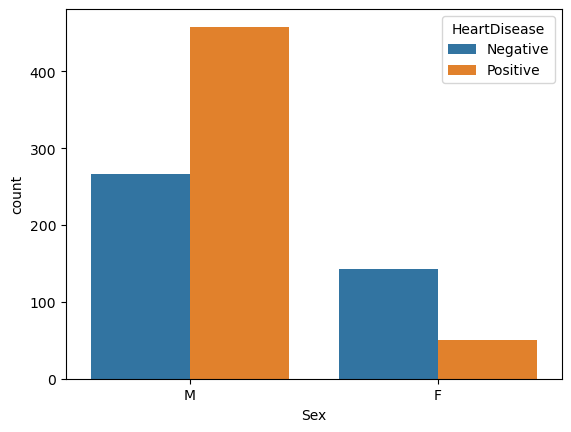

In [196]:
sns.countplot(x="Sex",hue="HeartDisease",data=df)
plt.show()

#### From the above visual we can assume that male has the higger ratio of heart attacks than female

#### Would like the see the Negative Positive ratio

<Axes: xlabel='HeartDisease', ylabel='count'>

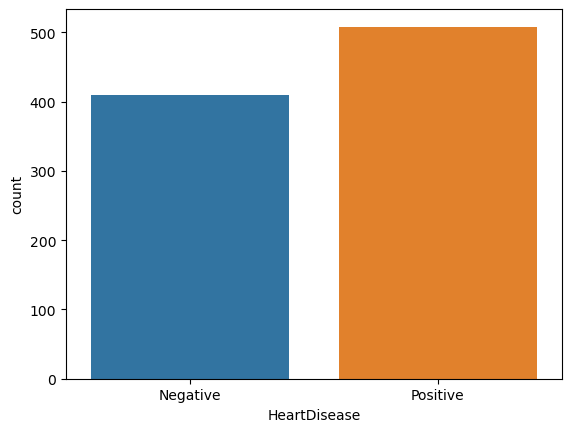

In [197]:
sns.countplot(x="HeartDisease",data=df)

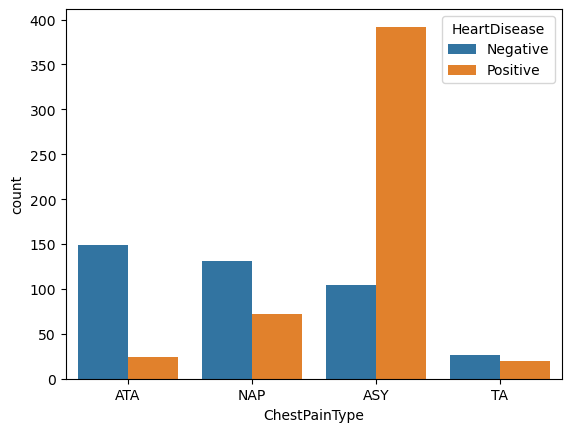

In [198]:
sns.countplot(x="ChestPainType",hue="HeartDisease",data=df)
plt.show()

#### Does being a ASY improve your chances of Heart attack? From the above image we can conclude that having ASY leads to high chance of heart attack

#### Lets check whether the data contain Null values or not 

In [199]:
total=df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


#### I am now satisfied with the exploratory data analysis I conducted

#### Now, We have to do some feature engineering , convert the string data into numeric so to develop them in our model

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [201]:
df['HeartDisease'] = df['HeartDisease'].map({'Negative': 0, 'Positive': 1})

#### Now, we have to identify categorical and numerical columns again, excluding the target variable 'HeartDisease'

In [202]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.drop('HeartDisease')

In [203]:
# Define preprocessing for numerical columns (scale them)
numerical_transformer = StandardScaler()

In [204]:
# Define preprocessing for categorical columns (encode them)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

####  Now, have to create the preprocessing pipeline

In [205]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

####  Spliting the dataset into training and testing sets

In [206]:

X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Now have to apply preprocessing to the training data

In [207]:

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

#### As the training is complete , now will deploy this training set into the model

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = LogisticRegression(max_iter=1000, random_state=42)

In [209]:

model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)

#### After the prediction , will see the accuracy of the model and some other reports

In [210]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[67 10]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



#### The model has the accuracy of 85% tells me that the model is performing quite good.  

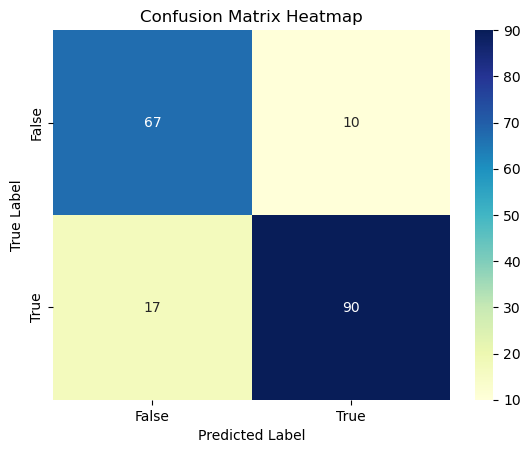

In [211]:
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Satisfy with the model , i would like to end my project here 

And there you have it – our journey through the heart of health predictions concludes here!

Cheers to predicting healthier hearts! 🩺✨